In [ ]:
#!pip install PyMySQL==1.0.0

In [4]:
import pymysql.cursors
# Connect to the database

In [2]:
connection = pymysql.connect(host='127.0.0.1',
        user='root',
        password='0000',
        db='TIP_Schema',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "select total_bill from TIP_Schema.tips where tip >= 7;"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
finally:
    connection.close()

{'total_bill': 39.42}


sql을 실행시켜 해당 커서의 값을 읽어서 출력.

In [5]:
import pandas as pd

In [6]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='127.0.0.1', user='root', 
                       password='0000', db='classicmodels', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:
    with conn.cursor() as curs:
        sql = "select total_bill from TIP_Schema.tips where tip >= 7;"
        curs.execute(sql)
        rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

        df = pd.DataFrame(rs)
        print(df)
      # df.to_csv('query.csv')를 통해 받아온 데이터프레임을 csv로 저장할 수 있음.

finally: 
    conn.close()

   total_bill
0       39.42
1       50.81
2       48.33


In [6]:
df

,total_bill
0,39.42
1,50.81
2,48.33


array([[<AxesSubplot:title={'center':'total_bill'}>]], dtype=object)

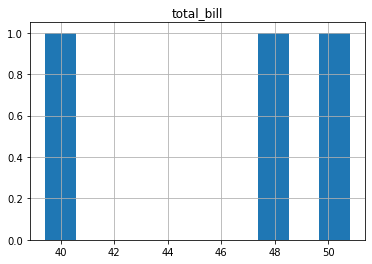

In [7]:
df.hist()

---

In [11]:
import pymysql.cursors
import pandas as pd

conn = pymysql.connect(host='127.0.0.1', user='root', 
                       password='0000', db='classicmodels', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:
    with conn.cursor() as curs:
        sql = """select customers.customername, payments.checknumber from classicmodels.customers
left join payments on customers.customernumber=payments.customernumber where payments.paymentdate >= '2004-06-06';"""
        curs.execute(sql)
        rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

        df = pd.DataFrame(rs)
        print(df)
        df.to_csv('query_result.csv')

finally: 
    conn.close()

                     customername checknumber
0               Atelier graphique    HQ336336
1               Atelier graphique    OM314933
2              Signal Gift Stores    BO864823
3              Signal Gift Stores    ND748579
4      Australian Collectors, Co.    MA765515
..                            ...         ...
127  Australian Collectables, Ltd    AB661578
128    Iberia Gift Imports, Corp.    GK294076
129  Motor Mint Distributors Inc.     HS86661
130             Kelly's Gift Shop    EU531600
131             Kelly's Gift Shop     MN89921

[132 rows x 2 columns]


In [12]:
df

,customername,checknumber
0,Atelier graphique,HQ336336
1,Atelier graphique,OM314933
2,Signal Gift Stores,BO864823
3,Signal Gift Stores,ND748579
4,"Australian Collectors, Co.",MA765515
...,...,...
127,"Australian Collectables, Ltd",AB661578
128,"Iberia Gift Imports, Corp.",GK294076
129,Motor Mint Distributors Inc.,HS86661
130,Kelly's Gift Shop,EU531600
